# Assigment 4 - Andrés Eduardo Ramírez Vela

## Notebook One

### Solution 1

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
stations = geopandas.read_file("data/paris_bike_stations_mercator.gpkg")

In [3]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [4]:
stations.head()

name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2             20011 - PYRÉNÉES-DAGORNO           21                0   
3        31008 - VINCENNES (MONTREUIL)           56                0   
4          43006 - MINIMES (VINCENNES)           28               27   

                         geometry  
0  POINT (259324.887 6247620.771)  
1  POINT (267824.377 6249062.894)  
2  POINT (267742.135 6250378.469)  
3  POINT (271326.638 6250750.824)  
4  POINT (270594.689 6248007.705)

In [5]:
stations.shape

(1226, 4)

### Solution 2

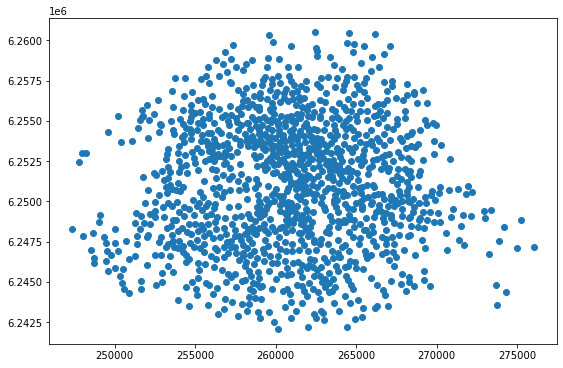

In [6]:
stations.plot(figsize=(12,6))

### Solution 3

In [7]:
import contextily

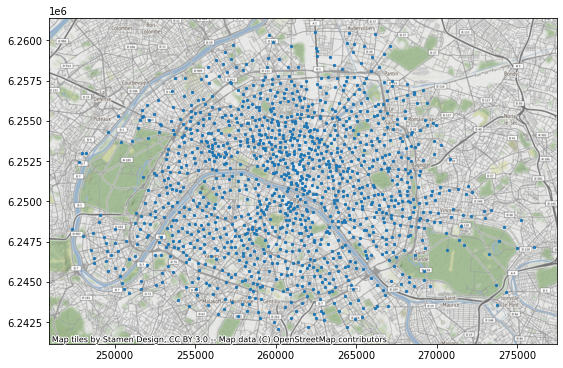

In [8]:
ax = stations.plot(figsize=(12,6), markersize=5)
contextily.add_basemap(ax)

### Solution 4

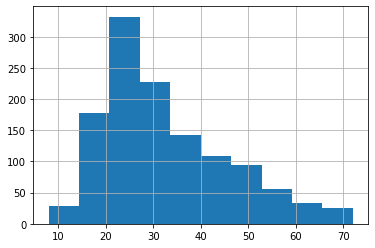

In [9]:
stations['bike_stands'].hist()

### Solution 5

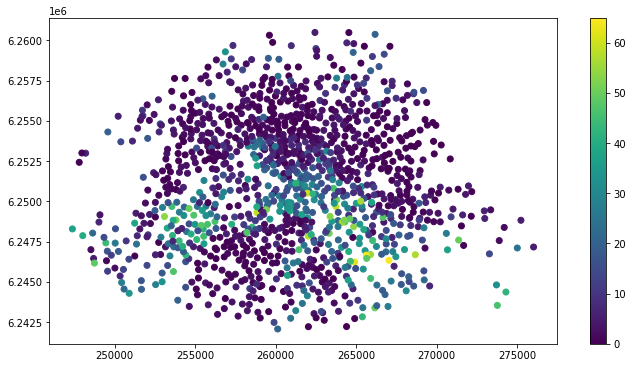

In [10]:
stations.plot(figsize=(12, 6), column='available_bikes', legend=True)

### Solution 6

In [11]:
districts = geopandas.read_file("data/paris_districts_utm.geojson")
districts.head()

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...

In [12]:
districts.shape

(80, 4)

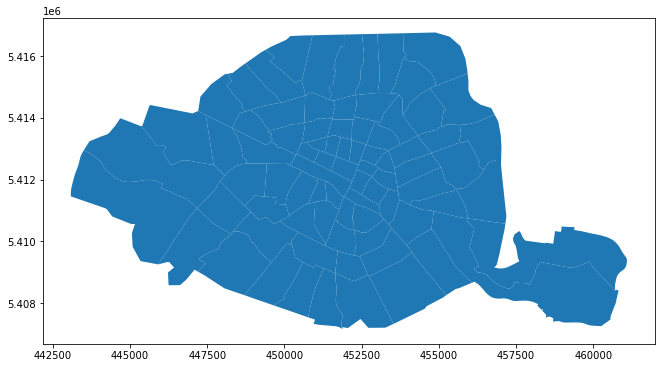

In [13]:
districts.plot(figsize=(12, 6))

### Solution 7

In [14]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [15]:
districts['area'] = districts.geometry.area / 1e6
districts.sort_values(by='area', ascending=False)

id   district_name  population  \
45  46          Picpus       62947   
60  61         Auteuil       67967   
44  45         Bel-Air       33976   
61  62          Muette       45214   
62  63  Porte-Dauphine       27423   
..  ..             ...         ...   
9   10  Enfants-Rouges        8562   
3    4   Place-Vendôme        3044   
5    6        Vivienne        2917   
11  12    Sainte-Avoie        7501   
4    5         Gaillon        1345   

                                             geometry      area  
45  POLYGON ((456790.759 5408686.978, 456841.941 5...  7.201383  
60  POLYGON ((444930.499 5411923.067, 444957.444 5...  6.380679  
44  POLYGON ((456987.121 5409120.599, 456996.502 5...  5.967841  
61  POLYGON ((444686.860 5413985.234, 445358.893 5...  5.475037  
62  POLYGON ((446548.869 5414236.010, 447025.036 5...  3.085061  
..                                                ...       ...  
9   POLYGON ((453580.220 5412266.849, 453591.609 5...  0.271603  
3   POLYGON ((451004.908 5412654.095, 450960.640 5...  0.269311  
5   POLYGON ((451686.936 5412747.032, 451682.879 5...  0.243418  
11  POLYGON ((452928.277 5412227.550, 452830.786 5...  0.213201  
4   POLYGON ((451328.752 5412991.278, 451294.721 5...  0.187910  

[80 rows x 5 columns]

### Solution 8

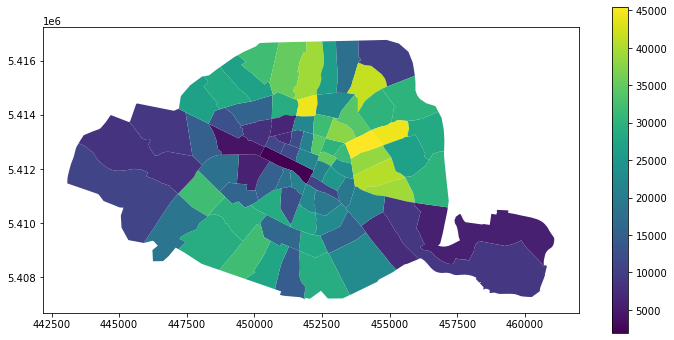

In [16]:
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6
districts.plot(column='population_density', figsize=(12, 6), legend=True)

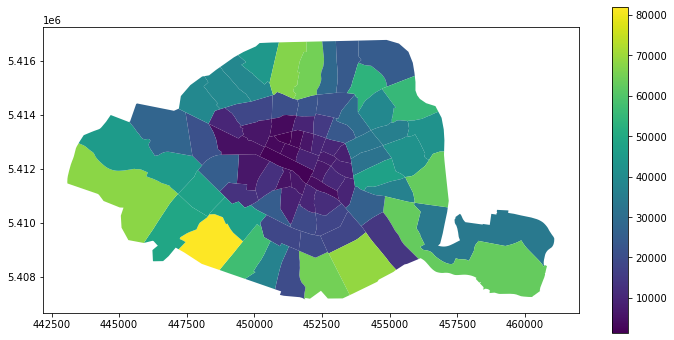

In [17]:
districts.plot(column='population', figsize=(12, 6), legend=True)

## Notebook Two

### Solution 1

In [18]:
districts = geopandas.read_file("data/paris_districts.geojson")
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
districts.head()

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...  
1  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...  
2  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...  
3  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...  
4  POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...

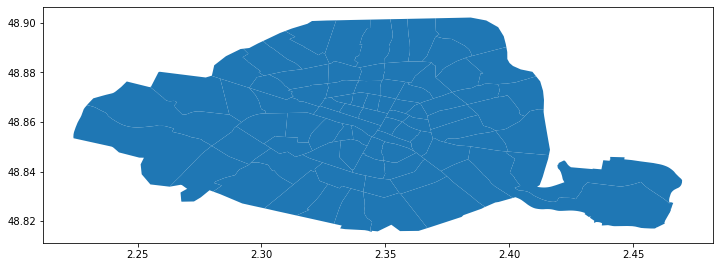

In [20]:
districts.plot(figsize=(12, 6))

In [21]:
districts.geometry.area

0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

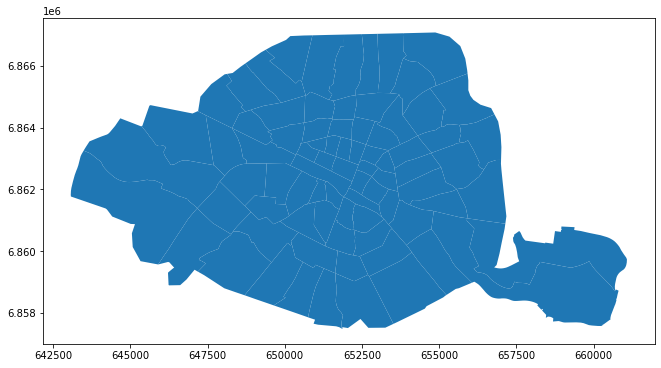

In [22]:
districts_RGF93 = districts.to_crs(epsg=2154)
districts_RGF93.plot(figsize=(12, 6))

In [23]:
districts_RGF93.geometry.area

0     8.690007e+05
1     4.124585e+05
2     2.736968e+05
3     2.694568e+05
4     1.880122e+05
          ...     
75    1.294988e+06
76    8.065686e+05
77    1.486971e+06
78    1.599002e+06
79    2.090904e+06
Length: 80, dtype: float64

### Solution 2

In [24]:
stations = geopandas.read_file("data/paris_bike_stations.geojson")
stations.head()

name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2             20011 - PYRÉNÉES-DAGORNO           21                0   
3        31008 - VINCENNES (MONTREUIL)           56                0   
4          43006 - MINIMES (VINCENNES)           28               27   

                   geometry  
0  POINT (2.32956 48.83920)  
1  POINT (2.40591 48.84772)  
2  POINT (2.40517 48.85550)  
3  POINT (2.43737 48.85770)  
4  POINT (2.43079 48.84149)

In [25]:
stations_webmercator = stations.to_crs(epsg=3857)
stations.head()

name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2             20011 - PYRÉNÉES-DAGORNO           21                0   
3        31008 - VINCENNES (MONTREUIL)           56                0   
4          43006 - MINIMES (VINCENNES)           28               27   

                   geometry  
0  POINT (2.32956 48.83920)  
1  POINT (2.40591 48.84772)  
2  POINT (2.40517 48.85550)  
3  POINT (2.43737 48.85770)  
4  POINT (2.43079 48.84149)

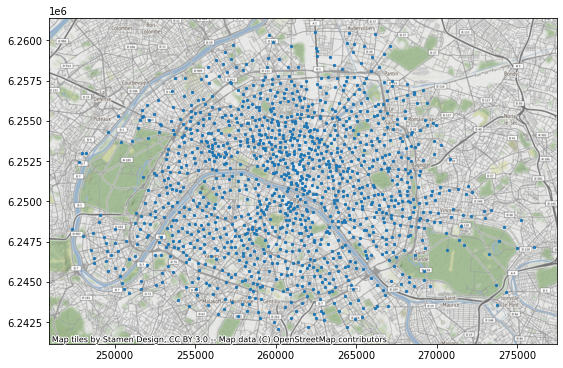

In [26]:
import contextily
ax = stations_webmercator.plot(markersize=5,figsize=(12, 6))
contextily.add_basemap(ax)

## Notebook Three 

### Solution 1

In [27]:
from shapely.geometry import Point
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)
eiffel_tower = Point(648237.3, 6862271.9)
print(eiffel_tower)

POINT (648237.3 6862271.9)


In [28]:
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

In [29]:
print(eiffel_tower.within(district_montparnasse))

False


In [30]:
print(district_montparnasse.contains(bike_station))

True


In [31]:
print(eiffel_tower.distance(bike_station))

3540.1534488921966


### Solution 2

In [32]:
eiffel_tower = Point(648237.3, 6862271.9)
mask = districts.contains(eiffel_tower)
mask

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [33]:
districts[mask]

id district_name  population  \
27  28  Gros-Caillou       25156   

                                             geometry  
27  POLYGON ((649336.752 6861767.761, 649110.815 6...

### Tercer punto

In [34]:
dist_eiffel = stations.distance(eiffel_tower)
dist_eiffel.min()

232.34672323454004

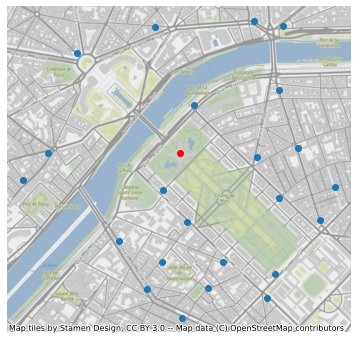

In [35]:
stations_eiffel = stations[dist_eiffel < 1000]
ax = stations_eiffel.to_crs(epsg=3857).plot(figsize=(12, 6))
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
import contextily
contextily.add_basemap(ax)
ax.set_axis_off()

### Special operations

In [36]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)


In [37]:
from pyproj import CRS
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":
[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":
[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],
 [2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],
 [2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],
 [2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],
 [2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],
 [2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],
 [2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],
 [2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],
 [2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

/Users/anramive/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


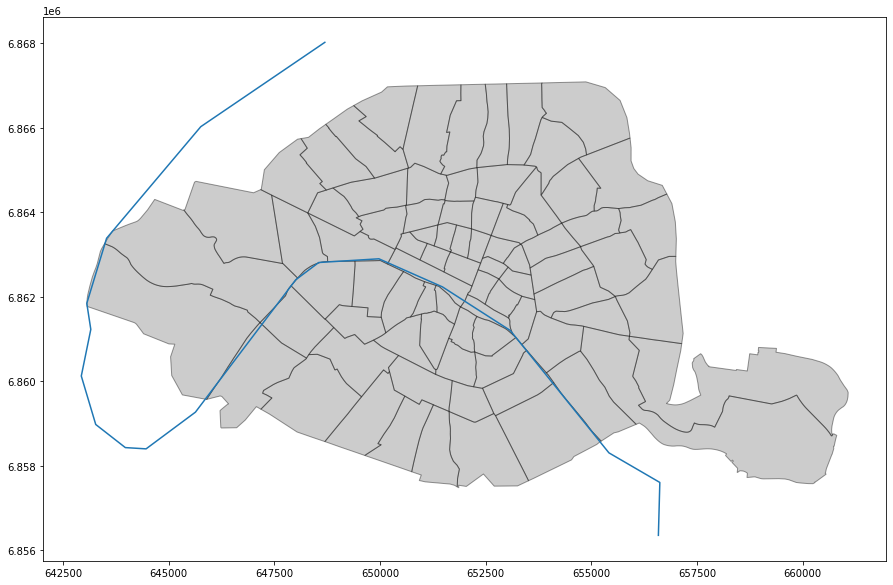

In [38]:
s_seine_utm = s_seine.to_crs(epsg=2154)
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

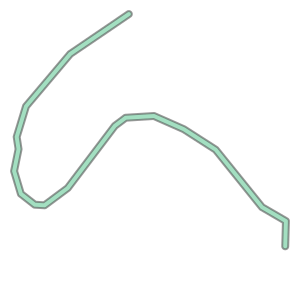

In [39]:
seine = s_seine_utm.geometry.squeeze()
seine_buffer = seine.buffer(150)
seine_buffer

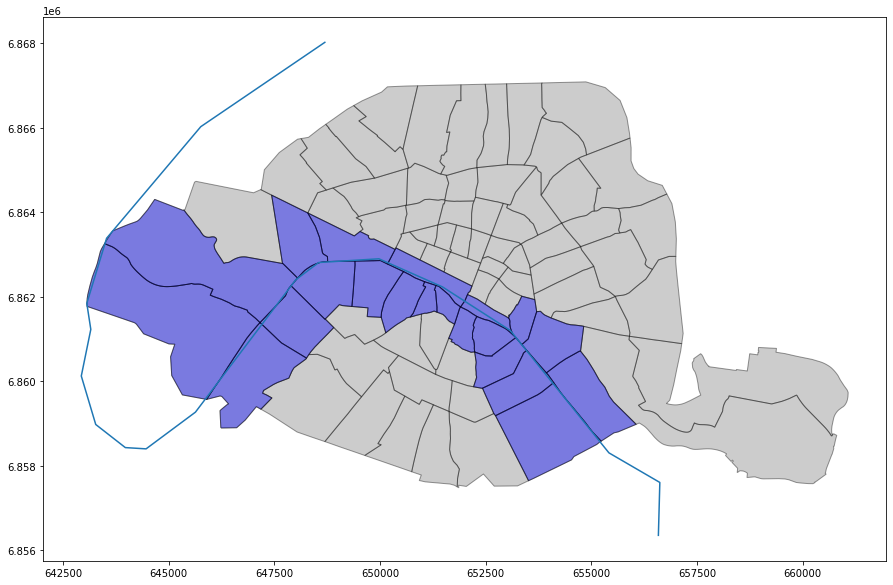

In [40]:
districts_seine = districts[districts.intersects(seine_buffer)]
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
districts_seine.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

## Notebook Four

### Solution 1

In [41]:
joined = geopandas.sjoin(stations, districts[['district_name', 'geometry']], op='within')
joined.head()

name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                           geometry  index_right district_name  
0    POINT (650791.111 6860114.328)           52  Montparnasse  
143  POINT (651406.382 6859738.689)           52  Montparnasse  
293  POINT (650694.991 6859723.873)           52  Montparnasse  
346  POINT (651327.035 6859441.637)           52  Montparnasse  
429  POINT (651261.351 6859926.893)           52  Montparnasse

### Solution 2

In [42]:
trees = geopandas.read_file("data/paris_trees.gpkg")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(trees.crs)
trees.head()

species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)

In [43]:
joined = geopandas.sjoin(trees, districts, op='within')
joined.head()

species location_type                        geometry  index_right  \
0     Marronnier    Alignement  POINT (455834.122 5410780.606)           43   
130  Micocoulier    Alignement  POINT (455458.848 5411310.443)           43   
142      Platane    Alignement  POINT (455704.681 5410991.067)           43   
402      Cedrele    Alignement  POINT (455538.223 5411112.314)           43   
428  Micocoulier    Alignement  POINT (455487.563 5411285.863)           43   

     id      district_name  population  
0    44  Sainte-Marguerite       36476  
130  44  Sainte-Marguerite       36476  
142  44  Sainte-Marguerite       36476  
402  44  Sainte-Marguerite       36476  
428  44  Sainte-Marguerite       36476

### Solution 3

In [44]:
trees_by_district = joined.groupby('district_name').size()
trees_by_district = trees_by_district.to_frame(name='n_trees')
trees_by_district.head()

n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392

### Solution 4

In [45]:
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees.head()

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7

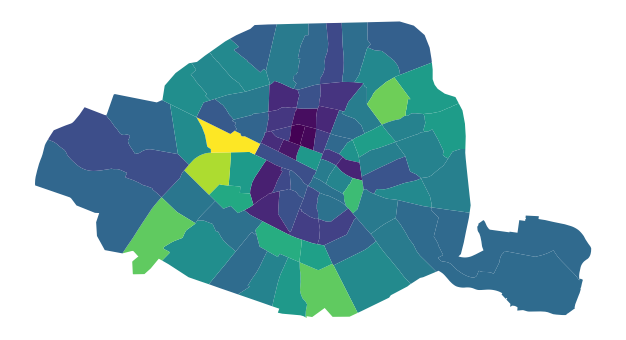

In [46]:
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area
ax = districts_trees.plot(column='n_trees_per_area', figsize=(12, 6))
ax.set_axis_off()

## Overlay exercises

### Solution 1

In [47]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
land_use.head()

class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  
1  POLYGON ((3751390.345 2886000.000, 3751390.345...  
2  POLYGON ((3751390.345 2886898.192, 3751390.370...  
3  POLYGON ((3751390.345 2887500.000, 3751390.345...  
4  POLYGON ((3751390.345 2888647.357, 3751390.370...

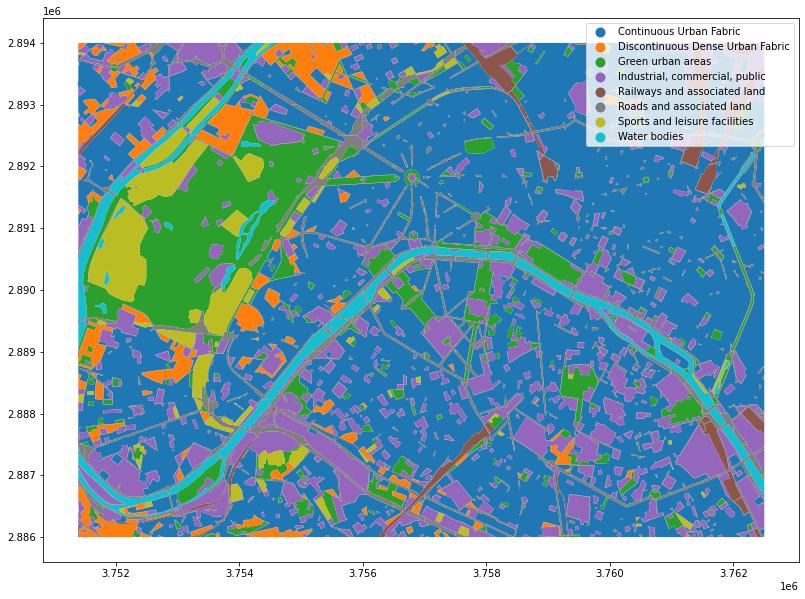

In [48]:
land_use.plot(column='class', legend=True, figsize=(15, 10))

In [49]:
land_use['area'] = land_use.geometry.area
total_area = land_use.groupby('class')['area'].sum() / 1000**2
total_area

class
Continuous Urban Fabric             45.943090
Discontinuous Dense Urban Fabric     3.657343
Green urban areas                    9.858438
Industrial, commercial, public      13.295042
Railways and associated land         1.935793
Roads and associated land            7.401574
Sports and leisure facilities        3.578509
Water bodies                         3.189706
Name: area, dtype: float64

### Solution 2

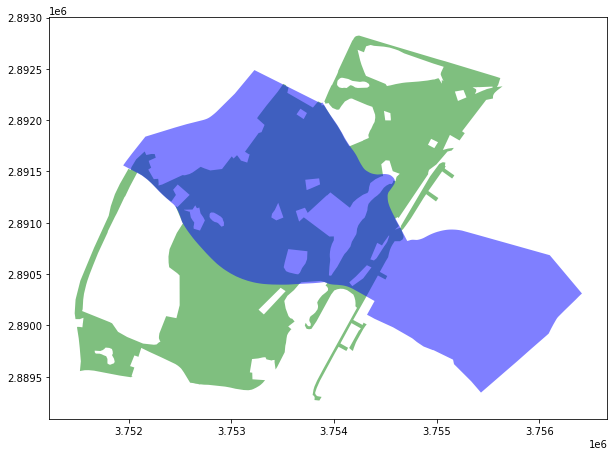

In [50]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)
land_use['area'] = land_use.geometry.area
park_boulogne = land_use[land_use['class'] == "Green urban areas"].sort_values('area').geometry.iloc[-1]
muette = districts[districts.district_name == 'Muette'].geometry.squeeze()
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'], figsize=(10, 10))

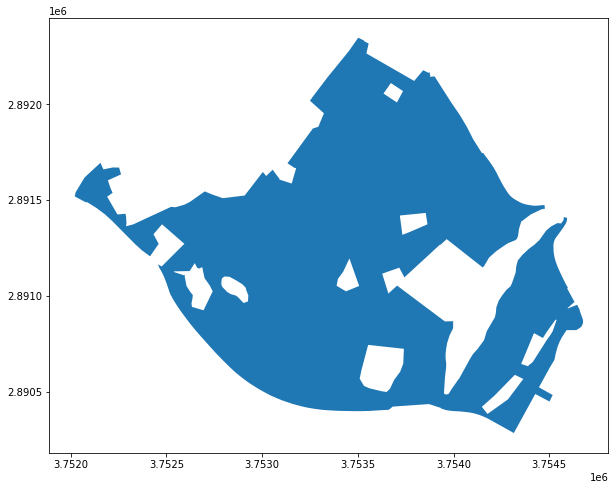

In [51]:
intersection = park_boulogne.intersection(muette)
geopandas.GeoSeries([intersection]).plot(figsize=(12,8))

In [52]:
print(intersection.area / muette.area)

0.4352082235640955


### Solution 3

In [53]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)
muette = districts[districts.district_name == 'Muette'].geometry.squeeze()

In [54]:
land_use_muette = land_use.geometry.intersection(muette)

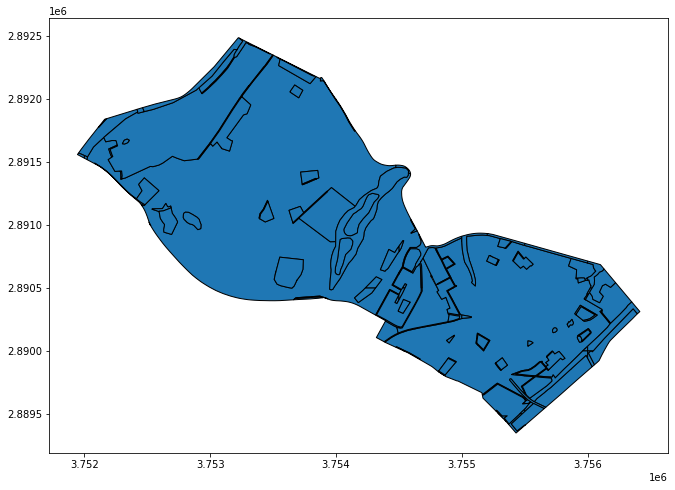

In [58]:
land_use_muette.plot(edgecolor='black', figsize=(12,8))

In [56]:
land_use_muette.head()

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry

In [57]:
land_use_muette = land_use.copy()
land_use_muette['geometry'] = land_use.geometry.intersection(muette)
land_use_muette = land_use_muette[~land_use_muette.is_empty]
land_use_muette.head()

class  \
135              Green urban areas   
229  Sports and leisure facilities   
239                   Water bodies   
278      Roads and associated land   
279      Roads and associated land   

                                              geometry  
135  POLYGON ((3752020.694 2891519.323, 3752025.310...  
229  POLYGON ((3752443.986 2891171.823, 3752446.430...  
239  POLYGON ((3752110.034 2891774.197, 3752112.444...  
278  POLYGON ((3752000.000 2891530.298, 3752000.000...  
279  POLYGON ((3751954.462 2891571.778, 3752000.000...

In [59]:
land_use_muette.dissolve(by='class')

geometry
class                                                                              
Continuous Urban Fabric           MULTIPOLYGON (((3755334.091 2889457.833, 37553...
Discontinuous Dense Urban Fabric  MULTIPOLYGON (((3755585.963 2889793.822, 37556...
Green urban areas                 MULTIPOLYGON (((3755772.518 2889995.038, 37558...
Industrial, commercial, public    MULTIPOLYGON (((3755275.182 2889527.443, 37552...
Railways and associated land      POLYGON ((3755654.921 2889540.054, 3755560.618...
Roads and associated land         MULTIPOLYGON (((3754820.067 2889843.877, 37548...
Sports and leisure facilities     MULTIPOLYGON (((3753932.354 2891267.190, 37539...
Water bodies                      MULTIPOLYGON (((3755507.459 2889412.262, 37555...

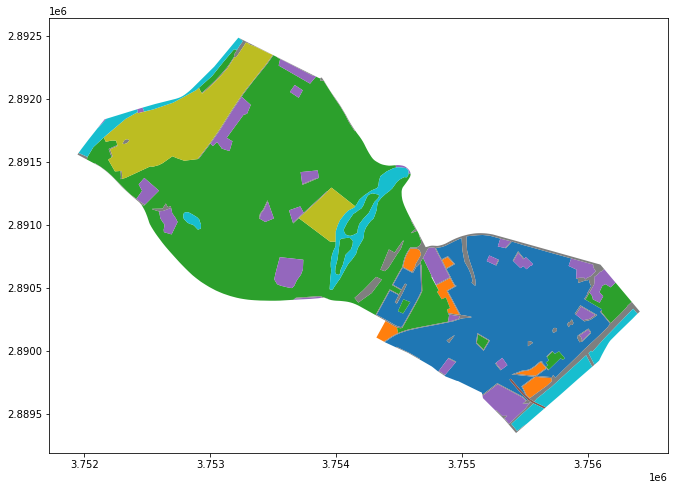

In [60]:
land_use_muette.dissolve(by='class').reset_index().plot(column='class', figsize=(12,8))

### Solution 4

In [61]:
combined = geopandas.overlay(land_use, districts, how='intersection')
combined.head()

class  id district_name  population  \
0               Water bodies  61       Auteuil       67967   
1    Continuous Urban Fabric  61       Auteuil       67967   
2  Roads and associated land  61       Auteuil       67967   
3          Green urban areas  61       Auteuil       67967   
4  Roads and associated land  61       Auteuil       67967   

                                            geometry  
0  POLYGON ((3751395.345 2890118.001, 3751395.345...  
1  MULTIPOLYGON (((3753253.104 2888254.529, 37532...  
2  POLYGON ((3751519.830 2890061.509, 3751522.057...  
3  MULTIPOLYGON (((3754314.717 2890283.121, 37543...  
4  POLYGON ((3751619.113 2890500.000, 3751626.627...

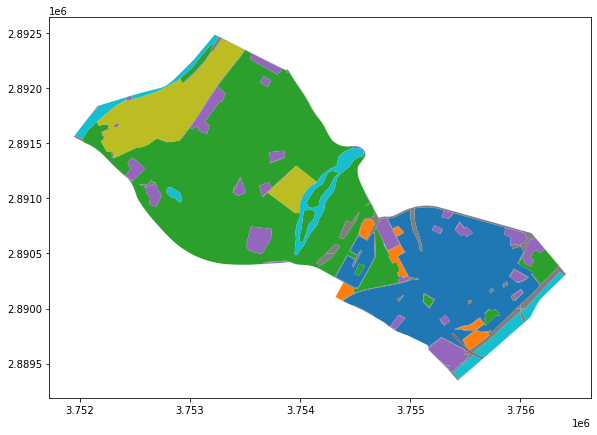

In [62]:
combined['area'] = combined.geometry.area
land_use_muette = combined[combined['district_name'] == 'Muette']
land_use_muette.plot(column='class',figsize=(11,7) )

In [63]:
print(land_use_muette.groupby('class')['area'].sum() / 1000**2)

class
Continuous Urban Fabric             1.275297
Discontinuous Dense Urban Fabric    0.088289
Green urban areas                   2.624229
Industrial, commercial, public      0.362990
Railways and associated land        0.005424
Roads and associated land           0.226271
Sports and leisure facilities       0.603989
Water bodies                        0.292194
Name: area, dtype: float64


## Notebook 5

In [64]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

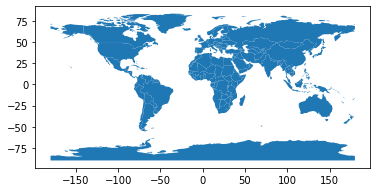

In [65]:
countries.plot()

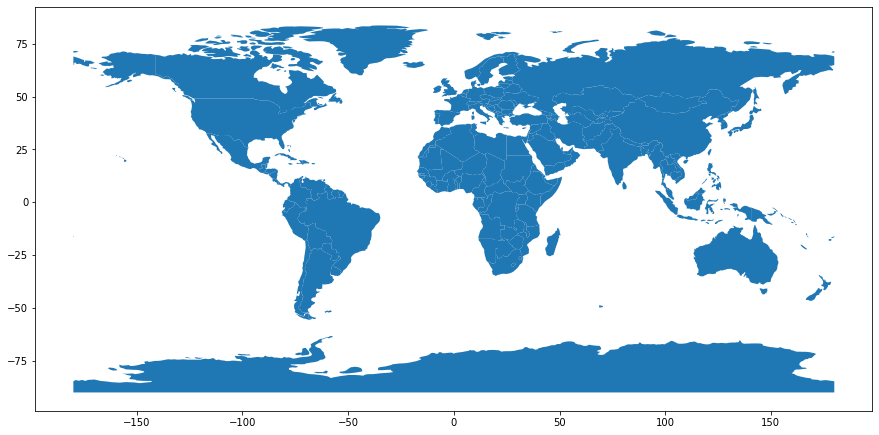

In [66]:
countries.plot(figsize =(15,15))

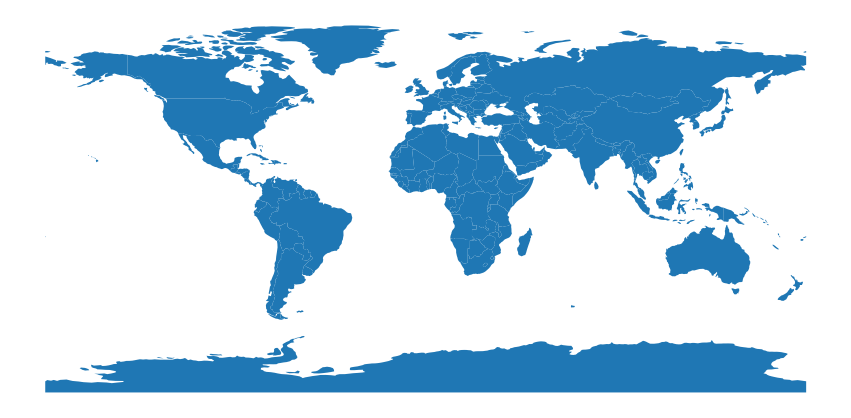

In [67]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

In [68]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

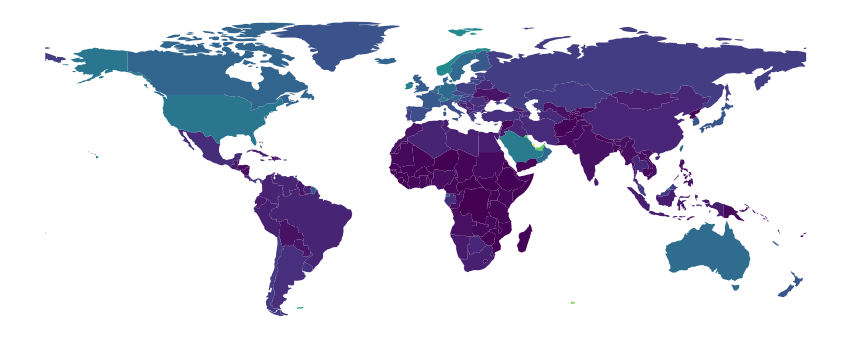

In [69]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

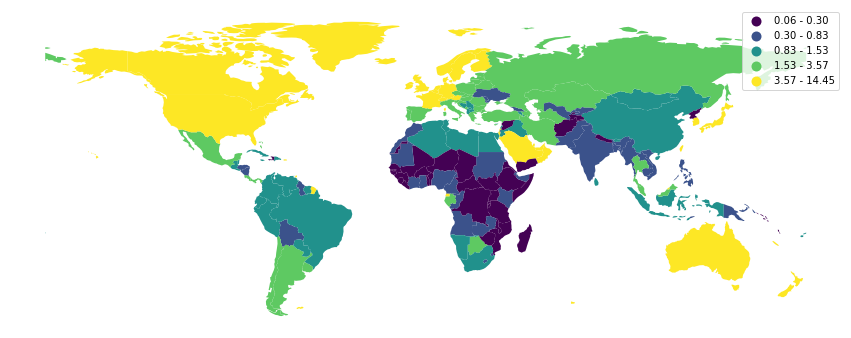

In [70]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

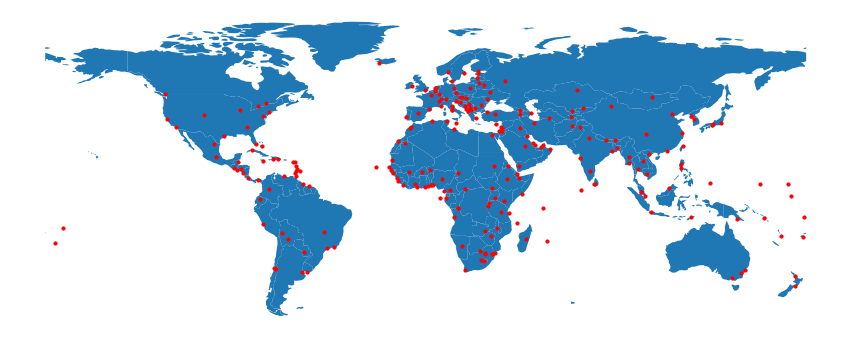

In [71]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-40.0, 40.0), (-20.0, 60.0)]

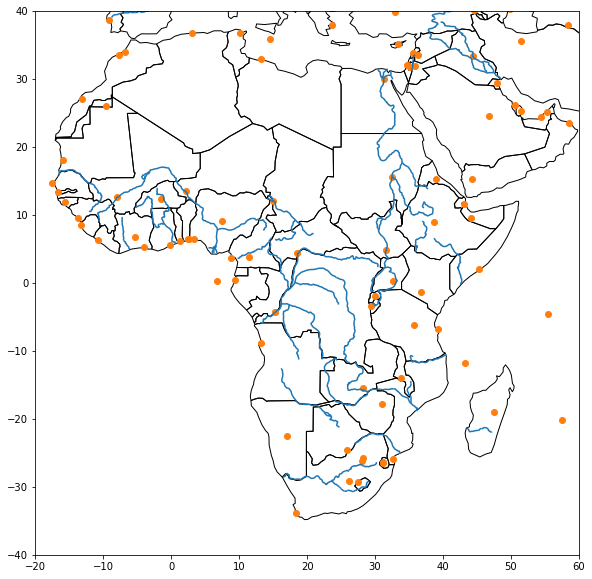

In [72]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

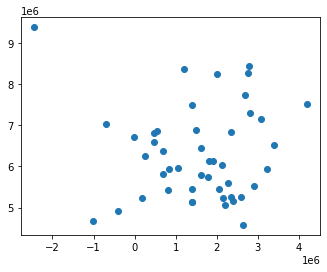

In [73]:
cities_europe = cities[cities.within(countries[countries['continent'] == 'Europe'].unary_union)]
cities_europe2 = cities_europe.to_crs(epsg=3857)
ax = cities_europe2.plot()

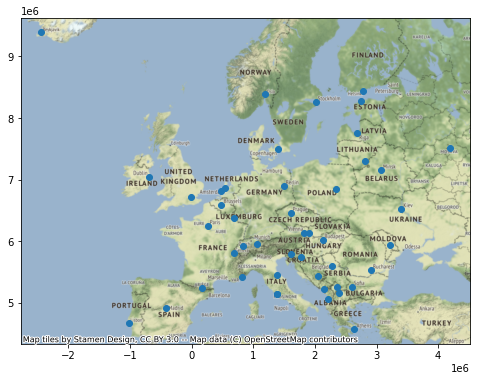

In [74]:
ax = cities_europe2.plot(figsize=(10, 6))
contextily.add_basemap(ax)

<ipython-input-75-a1532d0bea4a>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  contextily.add_basemap(ax, url=contextily.providers.Stamen.TonerLite)


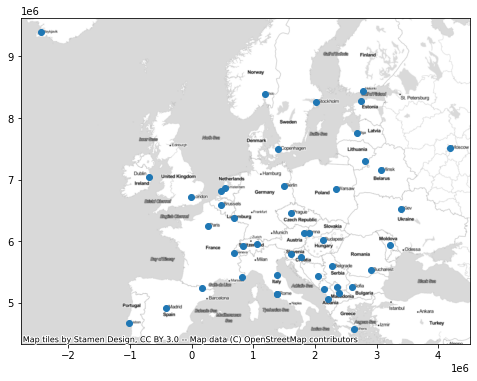

In [75]:
ax = cities_europe2.plot(figsize=(10, 6))
contextily.add_basemap(ax, url=contextily.providers.Stamen.TonerLite)

In [76]:
import geoplot
import geoplot.crs as gcrs

<ipython-input-77-04fdee40498f>:7: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)


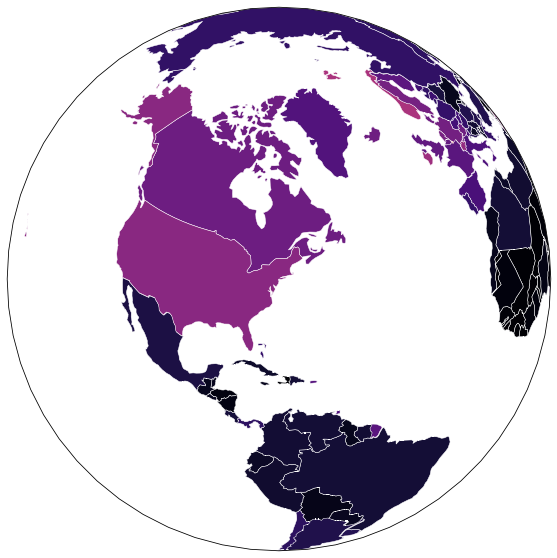

In [77]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
geoplot.choropleth(countries, hue='gdp_per_cap', projection=gcrs.Orthographic(), ax=ax,
                   cmap='magma', linewidth=0.5, edgecolor='white')
ax.set_global()
ax.outline_patch.set_visible(True)

In [78]:
from cartopy import crs as ccrs

In [79]:
crs = ccrs.AlbersEqualArea()
crs_proj4 = crs.proj4_init
countries_ae = countries.to_crs(crs_proj4)

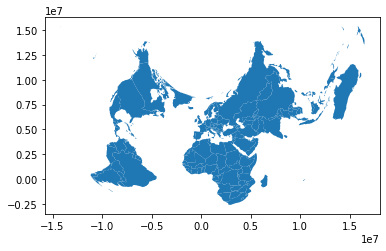

In [80]:
countries_ae.plot()

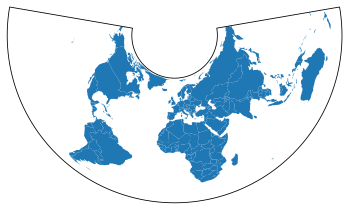

In [81]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(countries_ae['geometry'], crs=crs)

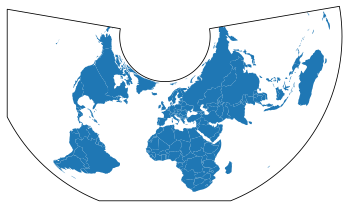

In [82]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
countries_ae['geometry'].plot(ax=ax)

In [83]:
import ipyleaflet

In [84]:
m = ipyleaflet.Map(center=[48.8566, 2.3429], zoom=6)
layer = ipyleaflet.GeoJSON(data=cities.__geo_interface__)
m.add_layer(layer)
m

Map(center=[48.8566, 2.3429], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [85]:
m = ipyleaflet.Map(center=[48.8566, 2.3429], zoom=3)
geo_data = ipyleaflet.GeoData(
    geo_dataframe = countries,
    style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    name = 'Countries')
m.add_layer(geo_data)
m

Map(center=[48.8566, 2.3429], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [86]:
import folium

In [87]:
m = folium.Map([48.8566, 2.3429], zoom_start=6, tiles="OpenStreetMap")
folium.GeoJson(countries).add_to(m)
folium.GeoJson(cities).add_to(m)
m

In [88]:
m = folium.Map([0, 0], zoom_start=1)
folium.Choropleth(geo_data=countries, data=countries, columns=['iso_a3', 'gdp_per_cap'],
             key_on='feature.properties.iso_a3', fill_color='BuGn', highlight=True).add_to(m)
m

## Notebook Six

### Case study - Conflict mapping: mining sites in eastern DR Congo

In this case study, we will explore a dataset on artisanal mining sites located in eastern DR Congo.

**Note**: this tutorial is meant as a hands-on session, and most code examples are provided as exercises to be filled in. I highly recommend actually trying to do this yourself, but if you want to follow the solved tutorial, you can find this in the `_solved` directory.

---

#### Background

[IPIS](http://ipisresearch.be/), the International Peace Information Service, manages a database on mining site visits in eastern DR Congo: http://ipisresearch.be/home/conflict-mapping/maps/open-data/

Since  2009, IPIS has visited artisanal mining sites in the region during various data collection campaigns. As part of these campaigns, surveyor teams visit mining sites in the field, meet with miners and complete predefined questionnaires. These contain questions about the mining site, the minerals mined at the site and the armed groups possibly present at the site.

### 1. Importing and exploring the data

### The mining site visit data

IPIS provides a WFS server to access the data. We can send a query to this server to download the data, and load the result into a geopandas GeoDataFrame:

In [90]:
import requests
import json
from pyproj import CRS
wfs_url = "http://geo.ipisresearch.be/geoserver/public/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='public:cod_mines_curated_all_opendata_p_ipis', outputFormat='json')

r = requests.get(wfs_url, params=params)
data_features = json.loads(r.content.decode('UTF-8'))
data_visits = geopandas.GeoDataFrame.from_features(data_features, crs={'init': 'epsg:4326'})

In [91]:
data_visits = geopandas.read_file("data/cod_mines_curated_all_opendata_p_ipis.geojson")
data_visits.head()

id  vid  \
0  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    1   
1  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    2   
2  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    3   
3  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    4   
4  cod_mines_curated_all_opendata_p_ipis.fid-11f0...    5   

                       source      project         pcode          name  \
0  IPIS - Ministère des Mines  IPIS - 2009  codmine00191          Eohe   
1  IPIS - Ministère des Mines  IPIS - 2009  codmine00192          Eita   
2  IPIS - Ministère des Mines  IPIS - 2009  codmine00242     Mungu Iko   
3  IPIS - Ministère des Mines  IPIS - 2009  codmine00260  Kiviri/Tayna   
4  IPIS - Ministère des Mines  IPIS - 2009  codmine00272       Makanga   

   visit_date  visit_onsite visit_onsite_novisitreason  longitude  ...  \
0  2009-01-01             1                       None  28.712580  ...   
1  2009-01-01             1                       None  28.699160  ...   
2  2009-01-01             1                       None  28.185142  ...   
3  2009-01-01             1                       None  28.884528  ...   
4  2009-01-01             1                       None  28.903945  ...   

   digging_armed_group2 forced_labour_armed_group2 pillaging_armed_group2  \
0                   NaN                        NaN                    NaN   
1                   NaN                        NaN                    NaN   
2                   NaN                        NaN                    NaN   
3                   NaN                        NaN                    NaN   
4                   NaN                        NaN                    NaN   

  state_service1 state_service2 state_service3 state_service4 itsci  \
0           None           None           None           None  None   
1           None           None           None           None  None   
2           None           None           None           None  None   
3           None           None           None           None  None   
4           None           None           None           None  None   

   qualification                   geometry  
0           None   POINT (28.71258 0.33188)  
1           None   POINT (28.69916 0.32153)  
2           None   POINT (28.18514 0.54499)  
3           None  POINT (28.88453 -0.35253)  
4           None  POINT (28.90395 -0.03671)  

[5 rows x 62 columns]

In [92]:
len(data_visits)

3687

In [93]:
data_visits = data_visits[['vid', 'project', 'visit_date', 'name', 'pcode', 'workers_numb', 'interference', 
                           'armed_group1', 'mineral1', 'geometry']]
data_visits.head()

vid      project  visit_date          name         pcode  workers_numb  \
0    1  IPIS - 2009  2009-01-01          Eohe  codmine00191         300.0   
1    2  IPIS - 2009  2009-01-01          Eita  codmine00192         110.0   
2    3  IPIS - 2009  2009-01-01     Mungu Iko  codmine00242           NaN   
3    4  IPIS - 2009  2009-01-01  Kiviri/Tayna  codmine00260           NaN   
4    5  IPIS - 2009  2009-01-01       Makanga  codmine00272           NaN   

   interference armed_group1 mineral1                   geometry  
0           NaN         None       Or   POINT (28.71258 0.33188)  
1           NaN         None       Or   POINT (28.69916 0.32153)  
2           NaN        FARDC       Or   POINT (28.18514 0.54499)  
3           NaN         FDLR       Or  POINT (28.88453 -0.35253)  
4           NaN         FDLR       Or  POINT (28.90395 -0.03671)

In [94]:
data_ipis = data_visits[data_visits['project'].str.contains('IPIS') & (data_visits['workers_numb'] > 0)]
data_ipis_lastvisit = data_ipis.sort_values('visit_date').groupby('pcode', as_index=False).last()
data = geopandas.GeoDataFrame(data_ipis_lastvisit, crs=data_visits.crs)

### Data on protected areas in the same region

Next to the mining site data, we are also going to use a dataset on protected areas (national parks) in Congo.

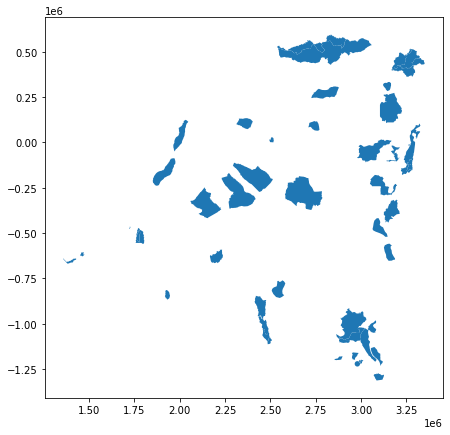

In [103]:
protected_areas = geopandas.read_file("data/Conservation/RDC_aire_protegee_2013.shp")
protected_areas.plot(figsize=(8,7))

### Conversion to a common Coordinate Reference System

In [104]:
from shapely.geometry import Point

In [105]:
goma = Point(29.22, -1.66)
dist_goma = data.distance(goma)
dist_goma.nsmallest(5)

301     0.226353
1868    0.235082
1865    0.252101
1067    0.263424
1538    0.264856
dtype: float64

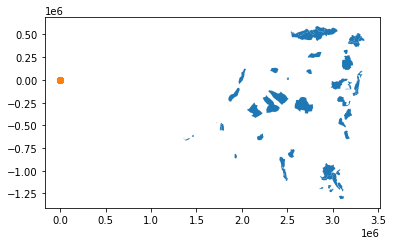

In [111]:
ax = protected_areas.plot()
data.plot(ax=ax, color='C1')

In [112]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [113]:
protected_areas.crs

<Projected CRS: PROJCS["RDC_Mercator",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: RDC_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

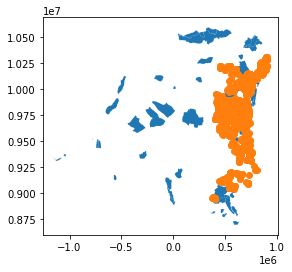

In [115]:
data_utm = data.to_crs(epsg=32735)
protected_areas_utm = protected_areas.to_crs(epsg=32735)
ax = protected_areas_utm.plot()
data_utm.plot(ax=ax, color='C1')

### More advanced visualizations

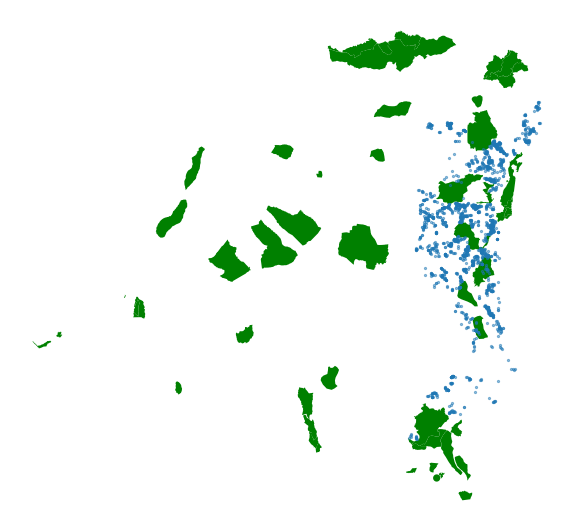

In [116]:
ax = protected_areas_utm.plot(figsize=(10, 10), color='green')
data_utm.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()

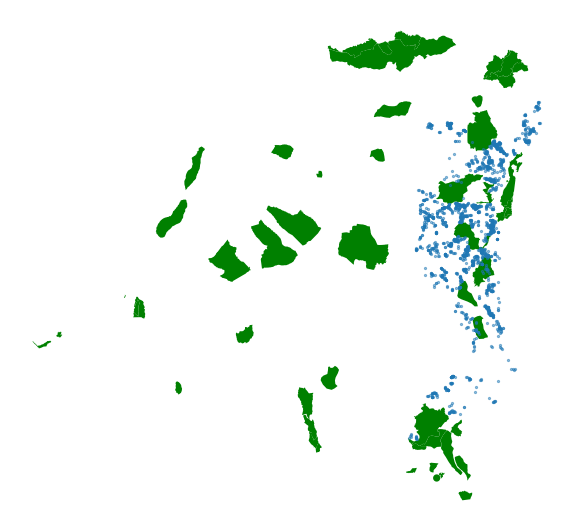

In [117]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect='equal'))
protected_areas_utm.plot(ax=ax, color='green')
data_utm.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()

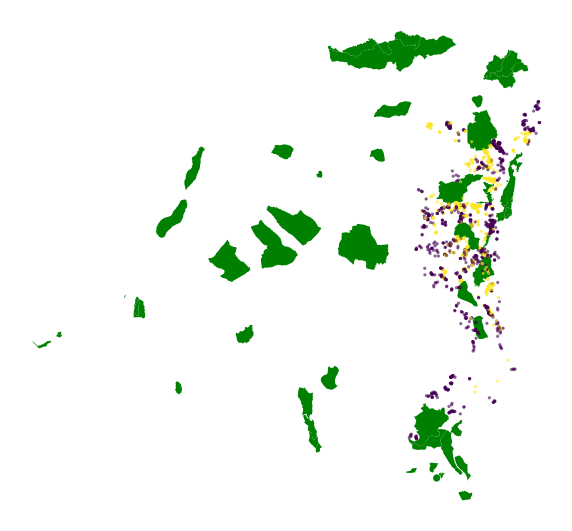

In [118]:
ax = protected_areas_utm.plot(figsize=(10, 10), color='green')
data_utm.plot(ax=ax, markersize=5, alpha=0.5, column='interference')
ax.set_axis_off()

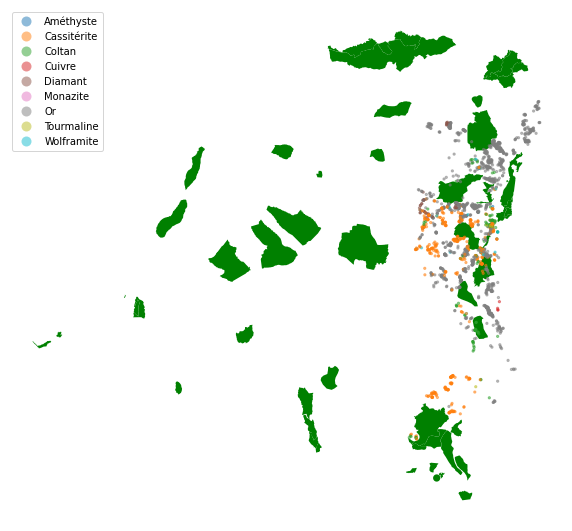

In [119]:
ax = protected_areas_utm.plot(figsize=(10, 10), color='green')
data_utm.plot(ax=ax, markersize=5, alpha=0.5, column='mineral1', legend=True)
ax.set_axis_off()

## 2. Spatial operations

In [120]:
kahuzi = protected_areas_utm[protected_areas_utm['NAME_AP'] == "Kahuzi-Biega National park"].geometry.squeeze()
mines_kahuzi = data_utm[data_utm.within(kahuzi)]
mines_kahuzi

pcode   vid                         project  visit_date  \
661   codmine00680  1032  IPIS - PROMINES MoFA 2013-2014  2013-08-28   
662   codmine00681  1025  IPIS - PROMINES MoFA 2013-2014  2013-08-26   
663   codmine00682  1031  IPIS - PROMINES MoFA 2013-2014  2013-08-27   
664   codmine00683  1033  IPIS - PROMINES MoFA 2013-2014  2013-08-28   
760   codmine00779  1603  IPIS - PROMINES MoFA 2013-2014  2014-02-25   
813   codmine00833  2439        IPIS - IOM PROMINES 2015  2015-07-28   
871   codmine00893  1226  IPIS - PROMINES MoFA 2013-2014  2013-09-28   
872   codmine00894  1305  IPIS - PROMINES MoFA 2013-2014  2013-10-30   
1486  codmine01764   180                     IPIS - 2009  2009-01-01   
1487  codmine01765   181                     IPIS - 2009  2009-01-01   
1681  codmine01997  2476        IPIS - IOM PROMINES 2015  2015-08-02   

                       name  workers_numb  interference    armed_group1  \
661           Ibozia/Kalumé          80.0           1.0  Raïa Mutomboki   
662                 Matamba         150.0           1.0  Raïa Mutomboki   
663           Mutete/Mukina         170.0           1.0  Raïa Mutomboki   
664                  Mutete         100.0           1.0  Raïa Mutomboki   
760               Mazankala         120.0           1.0  Raïa Mutomboki   
813              Kitendebwa          50.0           0.0            None   
871            Sebwa-Lukoma         130.0           1.0  Raïa Mutomboki   
872               Rwamakaza         160.0           1.0  Raïa Mutomboki   
1486               Mugaba I          50.0           NaN            None   
1487           Mugaba Ouest          46.0           NaN            None   
1681  Nguba(Nkuba) kamisoke         122.0           1.0  Raïa Mutomboki   

         mineral1                        geometry  
661   Cassitérite  POINT (567832.709 9759143.339)  
662   Cassitérite  POINT (598323.539 9758688.142)  
663   Cassitérite  POINT (570733.437 9761871.114)  
664   Cassitérite  POINT (569881.093 9762219.111)  
760   Cassitérite  POINT (613075.533 9722956.980)  
813            Or  POINT (693078.928 9770107.518)  
871   Cassitérite  POINT (660406.345 9715261.717)  
872   Cassitérite  POINT (661266.834 9716072.199)  
1486           Or  POINT (685167.371 9744069.967)  
1487           Or  POINT (683156.687 9746324.416)  
1681  Cassitérite  POINT (622151.349 9808363.111)

In [121]:
len(mines_kahuzi)

11

### Applying custom spatial functions

In [123]:
single_mine = data_utm.geometry[0]
dist = protected_areas_utm.distance(single_mine)
idx = dist.idxmin()
closest_area = protected_areas_utm.loc[idx, 'NAME_AP']
closest_area
def closest_protected_area(mine, protected_areas):
    dist = protected_areas.distance(mine)
    idx = dist.idxmin()
    closest_area = protected_areas.loc[idx, 'NAME_AP']
    return closest_area
result = data_utm.geometry.apply(lambda site: closest_protected_area(site, protected_areas_utm))

## 3. Using spatial join to determine mining sites in the protected areas

### Mining sites in protected areas

In [124]:
data_within_protected = geopandas.sjoin(data_utm, protected_areas_utm[['NAME_AP', 'geometry']],
                                        op='within', how='inner')
len(data_within_protected)

64

In [125]:
data_within_protected['NAME_AP'].value_counts()

Itombwe Nature Reserve          21
Luama-Katanga Hunting Domain    14
Kahuzi-Biega National park      11
Luama-Kivu Hunting Domain        9
Okapi Faunal Reserve             5
Maiko National park              3
Tayna Nature Reserve             1
Name: NAME_AP, dtype: int64

In [126]:
data_within_protected.groupby('NAME_AP')['workers_numb'].sum()

NAME_AP
Itombwe Nature Reserve          2987.0
Kahuzi-Biega National park      1178.0
Luama-Katanga Hunting Domain     930.0
Luama-Kivu Hunting Domain       1057.0
Maiko National park              493.0
Okapi Faunal Reserve             997.0
Tayna Nature Reserve             244.0
Name: workers_numb, dtype: float64

### Mining sites in the borders of protected areas

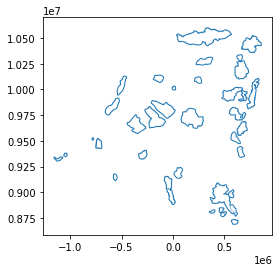

In [127]:
protected_areas_border = protected_areas_utm[['NAME_AP', 'geometry']].copy()
protected_areas_border['geometry'] = protected_areas_border.buffer(10000).difference(protected_areas_utm.unary_union)
protected_areas_border.plot()

In [128]:
data_within_border = geopandas.sjoin(data_utm, protected_areas_border,
                                     op='within', how='inner')
data_within_border['NAME_AP'].value_counts()

Kahuzi-Biega National park      99
Okapi Faunal Reserve            50
Maiko National park             33
Itombwe Nature Reserve          32
Luama-Kivu Hunting Domain       23
Kisimba Ikobo Nature Reserve    21
Tayna Nature Reserve            11
Luama-Katanga Hunting Domain     9
Upemba National park             4
Virunga National park            3
Mulumbu Hunting Domain           1
Name: NAME_AP, dtype: int64